## 1. Image Data Handling  

In [1]:
%pylab inline

import pandas as pd
from glob import glob

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
emergency_vehicles = glob('../datasets/emergency_classification/images/Emergency/*.jpg')
nonemergency_vehicles = glob('../datasets/emergency_classification/images/Non-Emergency/*.jpg')

In [5]:
len(emergency_vehicles), len(nonemergency_vehicles)

(991, 1361)

In [6]:
all_vehicles = emergency_vehicles + nonemergency_vehicles

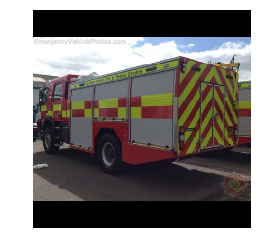

In [7]:
img_name = rng.choice(all_vehicles)

img = imread(img_name)

pylab.imshow(img)
pylab.axis('off')
pylab.show()

## 2. Data Loading and Preprocessing

In [8]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [9]:
images.shape

(2352, 100, 100, 3)

In [10]:
train_x = images.reshape(2352, 100*100*3)

In [11]:
train_x /= train_x.max()

In [12]:
train_y = data.emergency_or_not.values

In [13]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=seed)

## 3. Model Building

In [14]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3000100   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,000,201
Trainable params: 3,000,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6239 - acc: 0.6731 - val_loss: 0.6130 - val_acc: 0.6700
Epoch 2/10
1646/1646 [==============================] - 0s 212us/step - loss: 0.5740 - acc: 0.7272 - val_loss: 0.5891 - val_acc: 0.6912
Epoch 3/10
1646/1646 [==============================] - 0s 176us/step - loss: 0.5573 - acc: 0.7333 - val_loss: 0.5854 - val_acc: 0.6969
Epoch 4/10
1646/1646 [==============================] - 0s 203us/step - loss: 0.5487 - acc: 0.7339 - val_loss: 0.5846 - val_acc: 0.6898
Epoch 5/10
1646/1646 [==============================] - 0s 200us/step - loss: 0.5433 - acc: 0.7442 - val_loss: 0.5859 - val_acc: 0.6884
Epoch 6/10
1646/1646 [==============================] - 0s 215us/step - loss: 0.5404 - acc: 0.7430 - val_loss: 0.5782 - val_acc: 0.7025
Epoch 7/10
1646/1646 [==============================] - 0s 204us/step - loss: 0.5377 - acc: 0.7485 - val_loss: 0.5773 - val_acc: 0.7054
Epo

In [17]:
predictions = model.predict_classes(X_valid).ravel()
prediction_probabilities = model.predict(X_valid).ravel()
all_vehicles = np.array(emergency_vehicles + nonemergency_vehicles)

_, valid_vehicles, _, valid_y = train_test_split(all_vehicles,train_y,test_size=0.3, random_state=seed)

24 % sure that it is emergency


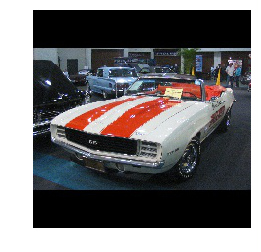

In [18]:
correct_predictions = valid_vehicles[predictions == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]


prob = (prediction_probabilities[predictions == Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

47 % sure that it is emergency


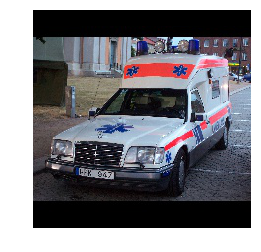

In [19]:
incorrect_predictions = valid_vehicles[predictions != Y_valid]
index = rng.choice(range(len(incorrect_predictions)))
img_name = incorrect_predictions[index]


prob = (prediction_probabilities[predictions != Y_valid] * 100).astype(int)[index]

img = imread(img_name)

print(prob , '% sure that it is emergency')
pylab.imshow(img)
pylab.axis('off')
pylab.show()

## 4. Hyperparameter Tuning

In [20]:
# increase hidden neurons
model=Sequential()

model.add(Dense(1024, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 1s 457us/step - loss: 0.6438 - acc: 0.6446 - val_loss: 0.6030 - val_acc: 0.6686
Epoch 2/10
1646/1646 [==============================] - 0s 225us/step - loss: 0.5733 - acc: 0.7278 - val_loss: 0.5899 - val_acc: 0.6983
Epoch 3/10
1646/1646 [==============================] - 0s 214us/step - loss: 0.5610 - acc: 0.7278 - val_loss: 0.6007 - val_acc: 0.6926
Epoch 4/10
1646/1646 [==============================] - 0s 221us/step - loss: 0.5527 - acc: 0.7369 - val_loss: 0.5835 - val_acc: 0.6997
Epoch 5/10
1646/1646 [==============================] - 0s 241us/step - loss: 0.5483 - acc: 0.7473 - val_loss: 0.6381 - val_acc: 0.6629
Epoch 6/10
1646/1646 [==============================] - 0s 230us/step - loss: 0.5466 - acc: 0.7339 - val_loss: 0.5759 - val_acc: 0.7082
Epoch 7/10
1646/1646 [==============================] - 0s 247us/step - loss: 0.5376 - acc: 0.7418 - val_loss: 0.5890 - val_acc: 0.7040
E

In [26]:
# increase hidden layers
model=Sequential()

model.add(Dense(1024, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 1s 577us/step - loss: 0.6780 - acc: 0.5863 - val_loss: 0.6795 - val_acc: 0.5623
Epoch 2/10
1646/1646 [==============================] - 0s 261us/step - loss: 0.6674 - acc: 0.5881 - val_loss: 0.6762 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 0s 290us/step - loss: 0.6579 - acc: 0.5899 - val_loss: 0.6682 - val_acc: 0.6586
Epoch 4/10
1646/1646 [==============================] - 0s 283us/step - loss: 0.6474 - acc: 0.6245 - val_loss: 0.6518 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 0s 298us/step - loss: 0.6339 - acc: 0.6312 - val_loss: 0.6424 - val_acc: 0.6204
Epoch 6/10
1646/1646 [==============================] - 0s 270us/step - loss: 0.6297 - acc: 0.6598 - val_loss: 0.6348 - val_acc: 0.6841
Epoch 7/10
1646/1646 [==============================] - 0s 257us/step - loss: 0.6199 - acc: 0.6744 - val_loss: 0.6276 - val_acc: 0.6799
E

In [29]:
# increase number of epochs
model=Sequential()

model.add(Dense(1024, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, epochs=50, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 1s 599us/step - loss: 0.6826 - acc: 0.5705 - val_loss: 0.6901 - val_acc: 0.5609
Epoch 2/50
1646/1646 [==============================] - 0s 247us/step - loss: 0.6676 - acc: 0.5857 - val_loss: 0.6808 - val_acc: 0.5609
Epoch 3/50
1646/1646 [==============================] - 0s 215us/step - loss: 0.6594 - acc: 0.5899 - val_loss: 0.6614 - val_acc: 0.6756
Epoch 4/50
1646/1646 [==============================] - 0s 240us/step - loss: 0.6462 - acc: 0.6294 - val_loss: 0.6559 - val_acc: 0.5609
Epoch 5/50
1646/1646 [==============================] - 0s 214us/step - loss: 0.6399 - acc: 0.6173 - val_loss: 0.6438 - val_acc: 0.6756
Epoch 6/50
1646/1646 [==============================] - 0s 253us/step - loss: 0.6316 - acc: 0.6495 - val_loss: 0.6407 - val_acc: 0.6105
Epoch 7/50
1646/1646 [==============================] - 0s 221us/step - loss: 0.6243 - acc: 0.6634 - val_loss: 0.6315 - val_acc: 0.6870
E

In [32]:
# change optimizer
model=Sequential()

model.add(Dense(1024, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs=50, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 1s 794us/step - loss: 1.6053 - acc: 0.5085 - val_loss: 1.2798 - val_acc: 0.4391
Epoch 2/50
1646/1646 [==============================] - 1s 351us/step - loss: 0.8951 - acc: 0.5498 - val_loss: 0.8182 - val_acc: 0.4391
Epoch 3/50
1646/1646 [==============================] - 1s 343us/step - loss: 0.7395 - acc: 0.5219 - val_loss: 0.6847 - val_acc: 0.5609
Epoch 4/50
1646/1646 [==============================] - 1s 368us/step - loss: 0.6854 - acc: 0.5541 - val_loss: 0.6792 - val_acc: 0.5609
Epoch 5/50
1646/1646 [==============================] - 1s 363us/step - loss: 0.6718 - acc: 0.5863 - val_loss: 0.6736 - val_acc: 0.5609
Epoch 6/50
1646/1646 [==============================] - 1s 381us/step - loss: 0.6606 - acc: 0.6136 - val_loss: 0.6621 - val_acc: 0.5609
Epoch 7/50
1646/1646 [==============================] - 1s 311us/step - loss: 0.6456 - acc: 0.6476 - val_loss: 0.6536 - val_acc: 0.5609
E

## 5. Comparison with Pre-trained model

![](images/pretrained_result.png)